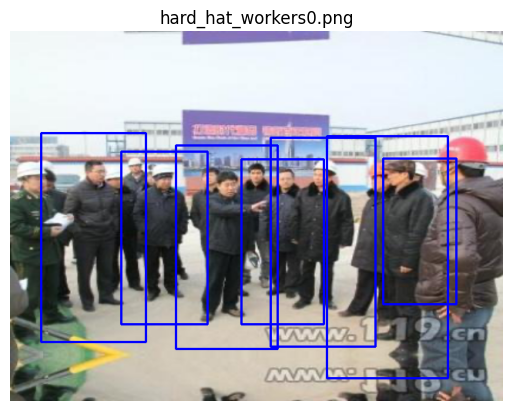

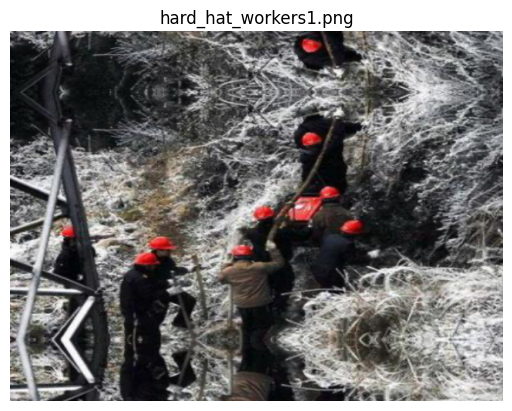

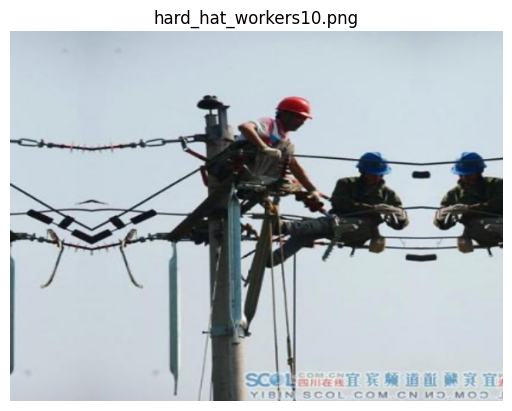

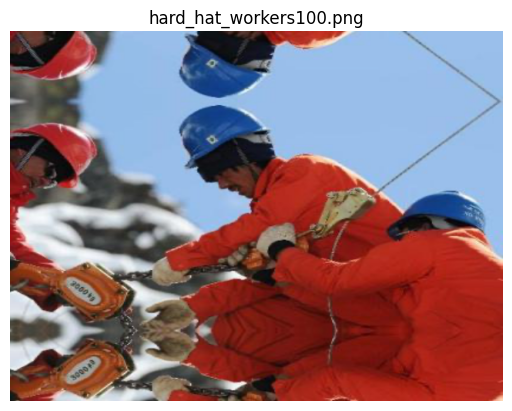

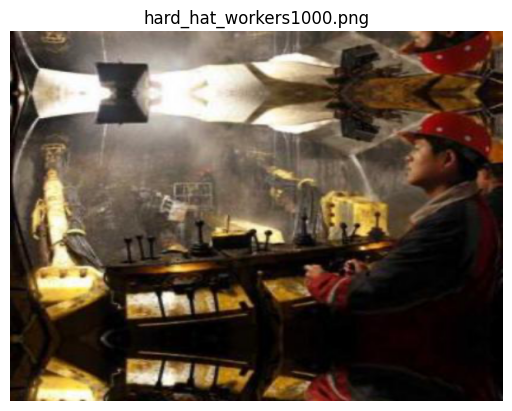

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

IMAGE_DIR = "images"  # dossier où sont stockées les images
OUTPUT_DIR = "hog_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Initialisation du détecteur HOG + SVM (pré-entraîné par OpenCV pour les personnes)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Liste de quelques images
samples = os.listdir(IMAGE_DIR)[:5]

for file in samples:
    path = os.path.join(IMAGE_DIR, file)
    image = cv2.imread(path)
    if image is None:
        continue

    image = cv2.resize(image, (640, 480))  # taille plus large pour meilleure détection

    # Détection
    boxes, weights = hog.detectMultiScale(image,
                                          winStride=(8, 8),
                                          padding=(8, 8),
                                          scale=1.05)

    # Dessiner les boxes
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Sauvegarde et affichage
    out_path = os.path.join(OUTPUT_DIR, f"hog_{file}")
    cv2.imwrite(out_path, image)

    # Affichage dans matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.axis('off')
    plt.show()